In [11]:
import numpy as np
import pandas as pd
tv = pd.read_csv("tvmarketing.csv")
tv
    

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [14]:
#1. Import dataset and display first 5 rows
import numpy as np
import pandas as pd
tv = pd.read_csv("tvmarketing.csv")
tv.head(5)
    

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [15]:
# 2. Check column data types
tv.dtypes

TV       float64
Sales    float64
dtype: object

In [17]:
# 3. Check the shape of the Data Frame (rows, columns)
tv.shape

(200, 2)

In [19]:
# 4. Look at summary statistics 
tv.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


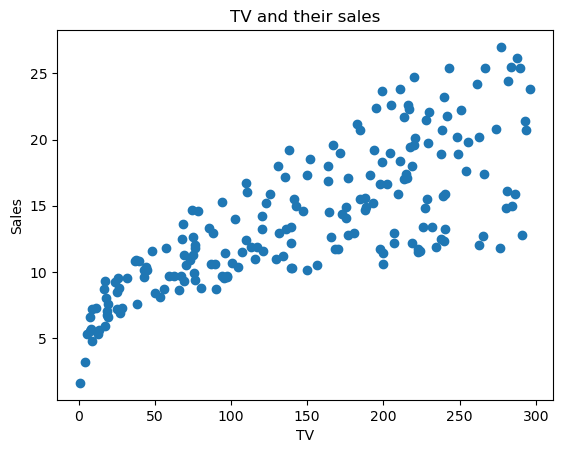

In [22]:
# 5. Visualize the relationship between the features and the dependent variable using scatterplots 
import matplotlib.pyplot as plt
plt.scatter(tv['TV'],tv['Sales'])
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("TV and their sales")
plt.show()

In [30]:
# 6. Prepare X (feature variables) and y (response variable)
x=tv[["TV"]]
y=tv["Sales"]

In [31]:
# 7. Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [32]:
# 8. Print the shape of train data and test data
print("Shape of train data: ",x_train.shape,y_train.shape)
print("Shape of test data: ",x_test.shape,y_test.shape)

Shape of train data:  (140, 1) (140,)
Shape of test data:  (60, 1) (60,)


In [44]:
# 9. Perform Linear Regression (on train data) without using any library and print the coefficients values
from sklearn.linear_model import LinearRegression
# x_train_np = np.c_[np.ones(x_train.shape[0]), x_train] 
x_mean = x_train.mean()
y_mean = y_train.mean()

x_train_np = np.array(x_train)
y_train_np = np.array(y_train)
n=len(x_train_np)


# for numerator
numerator = 0
for i in range(n):
    numerator += ((x_train_np[i]-x_mean)*(y_train_np[i]-y_mean))
# print("Numerator: ",numerator)

#for denominator
denominator = 0
for i in range(n):
    denominator += ((x_train_np[i]-x_mean)**2)
# print("Denominator: ",denominator)

theta1 = numerator/denominator
print(theta1)

# theta = np.linalg.inv(x_train_np.T @ x_train_np) @ x_train_np.T @ y_train
# print("Coefficients values:", theta)


TV    0.04649
dtype: float64


In [ ]:
# 10. Create the model using the calculated coefficients and make predictions on the testing set 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Import dataset and display first 5 rows
df = pd.read_csv('tvmarketing.csv')
print(df.head())

# 2. Check column data types
print(df.dtypes)

# 3. Check the shape of the Data Frame (rows, columns)
print("Shape of DataFrame:", df.shape)

# 4. Look at summary statistics
print(df.describe())

# 5. Visualize the relationship using scatterplot
plt.scatter(df['TV'], df['Sales'])
plt.xlabel('TV Marketing Budget')
plt.ylabel('Sales')
plt.title('TV Marketing Budget vs Sales')
plt.show()

# 6. Prepare X (feature variable) and y (response variable)
X = df[['TV']]
y = df['Sales']

# 7. Split Data into Training and Testing Sets (70%-Train, 30%-Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 8. Print the shape of train and test data
print("Train Data Shape:", X_train.shape, y_train.shape)
print("Test Data Shape:", X_test.shape, y_test.shape)

# 9. Perform Linear Regression manually
X_train_np = np.c_[np.ones(X_train.shape[0]), X_train]  # Add intercept term
theta = np.linalg.inv(X_train_np.T @ X_train_np) @ X_train_np.T @ y_train
print("Manual Regression Coefficients:", theta)

# 10. Predict on testing set using manual coefficients
X_test_np = np.c_[np.ones(X_test.shape[0]), X_test]
y_pred_manual = X_test_np @ theta

# 11. Perform Linear Regression using sklearn
lr = LinearRegression()
lr.fit(X_train, y_train)

# 12. Print intercept and coefficients
print("Intercept:", lr.intercept_)
print("Coefficient:", lr.coef_[0])

# 13. Make predictions on the testing set
y_pred_sklearn = lr.predict(X_test)

# 14. Plot train data and model
plt.scatter(X_train, y_train, color='blue', label="Train Data")
plt.plot(X_train, lr.predict(X_train), color='red', label="Regression Line")
plt.xlabel('TV Marketing Budget')
plt.ylabel('Sales')
plt.title('Linear Regression on Training Data')
plt.legend()
plt.show()

# 15. Plot test data and model
plt.scatter(X_test, y_test, color='green', label="Test Data")
plt.plot(X_test, lr.predict(X_test), color='red', label="Regression Line")
plt.xlabel('TV Marketing Budget')
plt.ylabel('Sales')
plt.title('Linear Regression on Testing Data')
plt.legend()
plt.show()

# 16. Print Mean Squared Error and R Squared Value
mse = mean_squared_error(y_test, y_pred_sklearn)
r2 = r2_score(y_test, y_pred_sklearn)
print("Mean Squared Error:", mse)
print("R-Squared Value:", r2)

# 17. Calculate and print R Squared and Adjusted R Squared manually
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print("Adjusted R-Squared Value:", adj_r2)
